# Cyber Security Tweet Analysis

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline 

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

from sklearn.preprocessing import MinMaxScaler

## Functions

In [2]:
! pip install DateTime

In [3]:
#Creating a function that takes in a range of values for K (or how many clusters)
# runs the model and then outputs the inertia value so we can see how well the clusters are grouped 


def evaluate_k_kmeans_inertia(k, vec):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(vec)
    return estimator_kmeans.inertia_

In [4]:
def splitData(data, len_of_frame):
    n = len(data.index) 
    split_n = round(n/len_of_frame, 0)
    print(split_n)
    splits = [int(x) for x in range(int(split_n))]
    lst = []
    for splt in splits:
        if splt == splits[-1]:
            lst.append(data[int(splt * len_of_frame):])
        else:
            lst.append(data[int(splt * len_of_frame):int(len_of_frame * (1 + splt))])
    return lst

In [5]:
def cluster_summary(ci, df):
    cluster = df[df.cluster_id==ci]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [6]:
# we can make a function that puts comparisons side by side so its easier for us to see in a data frame 

def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id, ident))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [7]:
def kmeans_cluster(df, n_clusters=2):
    """This function assigns clusters to every row in the dataframe via kmeans"""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [8]:
def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [199]:
def mainWords(cluster_data):
    main = []
    n = len(cluster_data.index) 
    for col in cluster_data.columns:
        if cluster_data[col].sum() > float(n/3):
            main += [col]
    return main

In [177]:
def findText(cluster_data):
    text_dict = {}
    text_dict['text'] = []
    text_dict['user_id'] = []
    ids_lst =  list(cluster_data.user_id)
    for ids in data['user_id']:
        if ids in ids_lst:
            for row in data[data.user_id == ids]['text']:
                text_dict['text'] += [row]
                text_dict['user_id'] += [ids]
    dataframe = pd.DataFrame(text_dict)
    cleanframe = dataframe.drop_duplicates(['text', 'user_id'])
    return cleanframe

## Text Analysis

In [9]:
data = pd.read_csv('cybersec_processed.csv', parse_dates=True)
data.head() # extra columns that I dont know got here 

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,...,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,day_post_created,year_account_created
0,0.0,x109082290,x1404488925935177737,2021-06-14 17:20:28,NcsVentures,sign cause solution network data breach cyber...,WordPress.com,109,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,14.0,2010.0
1,1.0,x109082290,x1403635112613494786,2021-06-12 08:47:43,NcsVentures,battling chinese big tech encroachment india ...,WordPress.com,103,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,12.0,2010.0
2,2.0,x109082290,x1403747937818120198,2021-06-12 16:16:03,NcsVentures,ask dr jeanette success way devil choke chain ...,WordPress.com,226,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,12.0,2010.0
3,3.0,x109082290,x1404021845913899009,2021-06-13 10:24:28,NcsVentures,threat digital pakistan cyberattack,WordPress.com,89,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,13.0,2010.0
4,4.0,x109082290,x1404053089804554241,2021-06-13 12:28:37,NcsVentures,pakistan attack news pakistan army claim major...,WordPress.com,152,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,13.0,2010.0


In [10]:
data[data["Unnamed: 0"].isna()]

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,...,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,day_post_created,year_account_created
4724,NaN,Marky_Sparky_Twerpy_action,131,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4726,NaN,Marky_Sparky_Twerpy_action,105,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4728,NaN,Marky_Sparky_Twerpy_action,95,NaN,NaN,NaN,False,False,1,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4730,NaN,Marky_Sparky_Twerpy_action,116,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4733,NaN,Marky_Sparky_Twerpy_action,125,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4735,NaN,Marky_Sparky_Twerpy_action,83,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4737,NaN,Marky_Sparky_Twerpy_action,117,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN
4739,NaN,Marky_Sparky_Twerpy_action,122,NaN,NaN,NaN,False,False,0,0,...,https://pbs.twimg.com/profile_banners/34316037...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1227691993...,14,2015.0,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data.drop(labels = [4724, 4726, 4728, 4730, 4733, 4735, 4737, 4739], axis = 0)

In [12]:
data.shape

(17656, 93)

In [13]:
from datetime import datetime
data['created_at'] = data[["created_at"]].apply(pd.to_datetime)
data['created_at'] = data['created_at'].apply(datetime.date)
data[['created_at']]

,created_at
0,2021-06-14
1,2021-06-12
2,2021-06-12
3,2021-06-13
4,2021-06-13
...,...
17659,2021-06-11
17660,2021-06-11
17661,2021-06-11
17662,2021-06-11


In [14]:
text = data[['text', 'created_at']]
text.drop_duplicates('text')
text.head()

,text,created_at
0,sign cause solution network data breach cyber...,2021-06-14
1,battling chinese big tech encroachment india ...,2021-06-12
2,ask dr jeanette success way devil choke chain ...,2021-06-12
3,threat digital pakistan cyberattack,2021-06-13
4,pakistan attack news pakistan army claim major...,2021-06-13


In [15]:
text.shape

(17656, 2)

In [ ]:
fdist_country = FreqDist()

for country in data['country']:
    fdist_country[country]+=1
fdist_country 

In [ ]:
fdist_country.most_common(5)

### Word Frequency 

In [16]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words[:5]

['sign', 'cause', 'solution', 'network', 'data']

In [17]:
len(cs_words)

231447

In [18]:
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'data': 1545, 'new': 1537, 'attack': 1400, 'infosec': 1333, 'ransomware': 1312, 'amp': 1188, 'business': 1039, 'u': 1037, 'threat': 877, 'hacker': 864, ...})

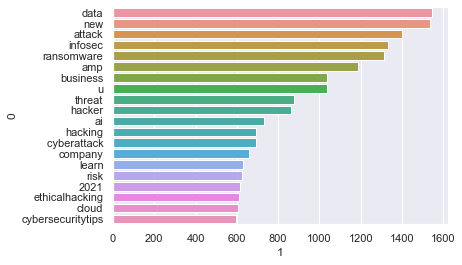

In [19]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))
sns.barplot(data = freq_data, x = 1, y = 0);

In [20]:
most_common = []

for key in fdist.most_common(25):
    most_common.append(key[0])
    
print(most_common)

['data', 'new', 'attack', 'infosec', 'ransomware', 'amp', 'business', 'u', 'threat', 'hacker', 'ai', 'hacking', '\xa0cyberattack', 'company', 'learn', 'risk', '2021', 'ethicalhacking', 'cloud', 'cybersecuritytips', 'cybersecuritynews', 'iotcybersec24', 'help', 'system', 'need']


In [21]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

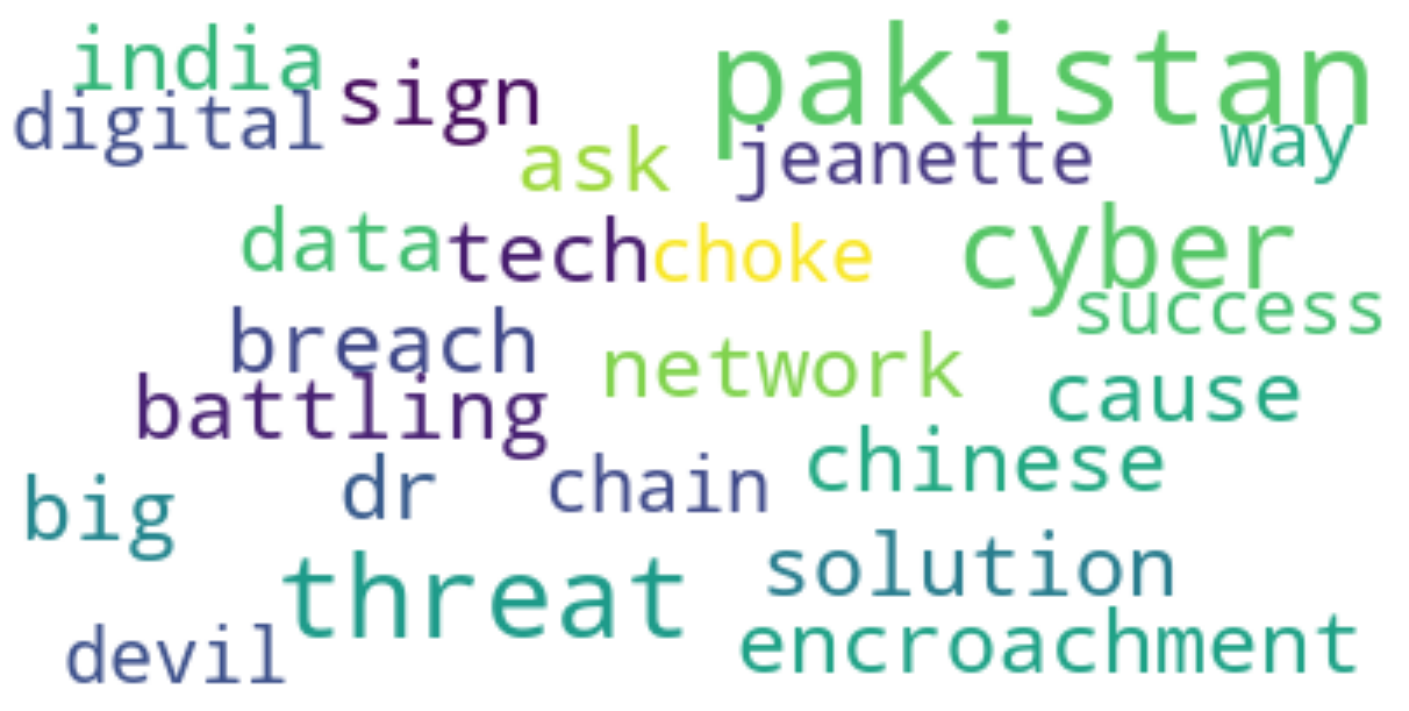

In [22]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text)
wc = WordCloud(
         background_color="white", max_words=2000, 
         min_font_size =15, max_font_size=40, relative_scaling = 
         0.5, stopwords=new_stopwords,normalize_plurals= True, random_state = 42)
import re 
textonly = re.sub(" ", " ",str(text))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()
# devil is interesting, Intel is possibly the company, 
# Jeanette Manfra is commonly found when searching jeannette
# and cybersecurity
# Microsoft Azure Sentinel is a scalable, cloud-native, security information 
# event management (SIEM) and security orchestration automated response (SOAR) solution. 
# Los Angeles and Pakistan are the only locations, chinese is only nationality

### Sentiment Analysis

In [23]:
sid = SentimentIntensityAnalyzer()
text['scores'] = text['text'].apply(lambda review: sid.polarity_scores(str(review)))
text.head()

,text,created_at,scores
0,sign cause solution network data breach cyber...,2021-06-14,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp..."
1,battling chinese big tech encroachment india ...,2021-06-12,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp..."
2,ask dr jeanette success way devil choke chain ...,2021-06-12,"{'neg': 0.256, 'neu': 0.55, 'pos': 0.194, 'com..."
3,threat digital pakistan cyberattack,2021-06-13,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp..."
4,pakistan attack news pakistan army claim major...,2021-06-13,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou..."


In [24]:
text['compound']  = text['scores'].apply(lambda score_dict: score_dict['compound'])
text.head()

,text,created_at,scores,compound
0,sign cause solution network data breach cyber...,2021-06-14,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182
1,battling chinese big tech encroachment india ...,2021-06-12,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.2732
2,ask dr jeanette success way devil choke chain ...,2021-06-12,"{'neg': 0.256, 'neu': 0.55, 'pos': 0.194, 'com...",-0.4404
3,threat digital pakistan cyberattack,2021-06-13,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp...",-0.5267
4,pakistan attack news pakistan army claim major...,2021-06-13,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351


In [25]:
text['comp_score'] = text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))
text.head()

,text,created_at,scores,compound,comp_score
0,sign cause solution network data breach cyber...,2021-06-14,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182,pos
1,battling chinese big tech encroachment india ...,2021-06-12,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.2732,neg
2,ask dr jeanette success way devil choke chain ...,2021-06-12,"{'neg': 0.256, 'neu': 0.55, 'pos': 0.194, 'com...",-0.4404,neg
3,threat digital pakistan cyberattack,2021-06-13,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp...",-0.5267,neg
4,pakistan attack news pakistan army claim major...,2021-06-13,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351,neg


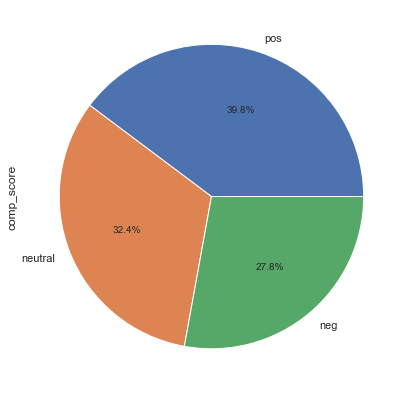

In [26]:
fig, ax = plt.subplots(figsize=(7,7))
comp_score_counts = text.comp_score.value_counts()
comp_score_counts.plot.pie(autopct="%.1f%%");

### Time Series Analysis on Compound Score

In [27]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [28]:
time_series_com = text[['created_at', "compound"]].set_index('created_at')
time_series_com.head()

,compound
created_at,
2021-06-14,0.3182
2021-06-12,-0.2732
2021-06-12,-0.4404
2021-06-13,-0.5267
2021-06-13,-0.7351


In [250]:
time_series_com = time_series_com.groupby('created_at').mean('compound')

In [252]:
time_series_com

,compound
created_at,
2021-06-11,0.093343
2021-06-12,0.042218
2021-06-13,0.056283
2021-06-14,0.083906


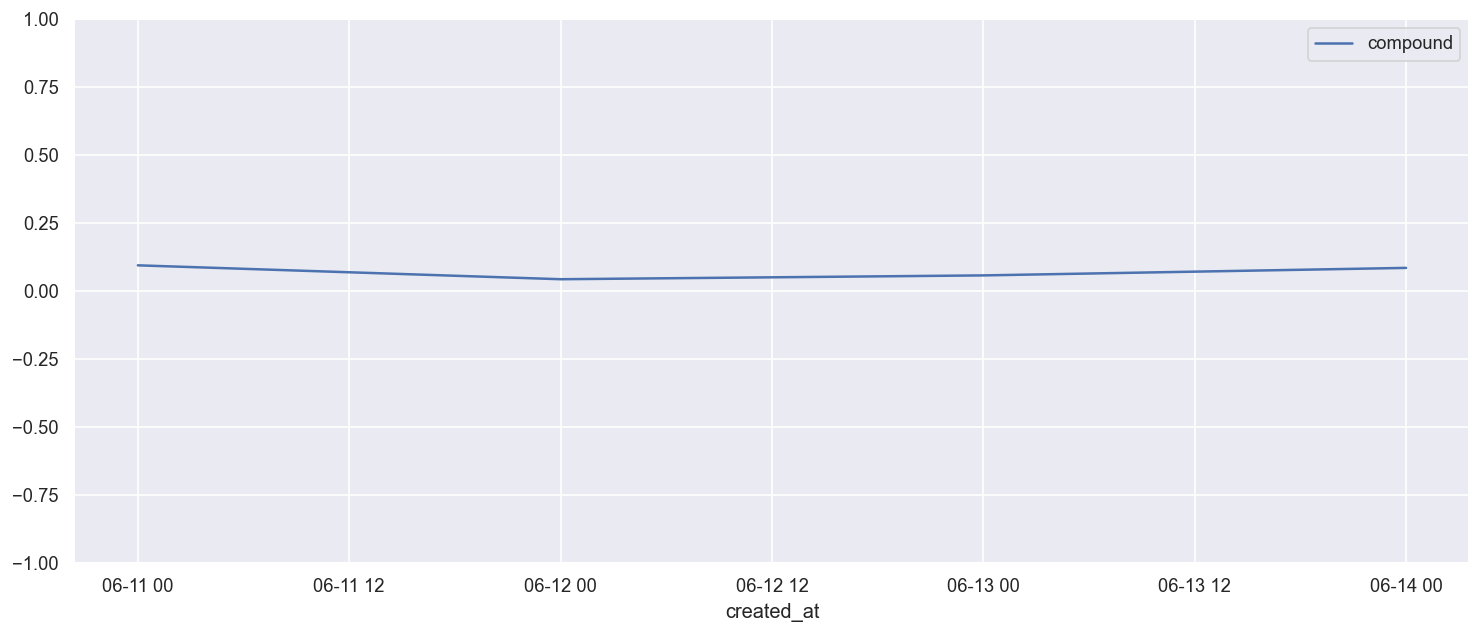

In [254]:
time_series_com.plot(figsize=(15, 6))
plt.ylim((-1,1))
plt.show()

### Cluster Analysis

In [249]:
time_series_com = time_series_com.groupby('created_at').mean('compound')

In [30]:
text_vec = pd.read_csv('cybersec_text_vectorized.csv')
text_vec.head()

,Unnamed: 0,000,002002,0027,003,004,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,00bytes,...,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zwijberg,zyxel,zyz
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
text_vec = text_vec.drop('Unnamed: 0', axis = 1)
text_vec.head()

,000,002002,0027,003,004,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,00bytes,01,...,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zwijberg,zyxel,zyz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k, text_vec)
    # 13min 10s

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 35min 58s, sys: 3min 30s, total: 39min 28s
Wall time: 13min 10s


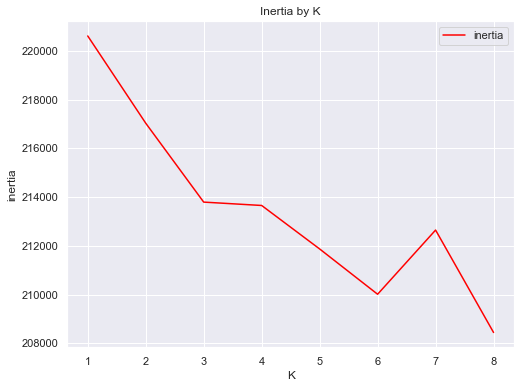

In [50]:
# we can now plot this to see where the inflection point is or where adding more clusters doesnt really add to gaining
# more information from extra clusters

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [52]:
%%time
estimator_kmeans = KMeans(random_state=42, n_clusters=6) # making it 6 now to see what happens

estimator_kmeans.fit(text_vec) 

CPU times: user 7min 11s, sys: 29.7 s, total: 7min 41s
Wall time: 2min 12s


KMeans(n_clusters=6, random_state=42)

In [53]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,000,002002,0027,003,004,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,00bytes,01,...,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zwijberg,zyxel,zyz,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,000,002002,0027,003,004,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,00bytes,01,...,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zwijberg,zyxel,zyz
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,6.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0


In [56]:
text_clusters_20 = text_clusters[['data', 'new', 'attack', 'infosec', 'ransomware', 'amp', 'business', 'us', 'threat', 'hacker', 'ai', 'hacking', 'cyberattack', 'company', 'learn', 'risk', '2021', 'ethicalhacking', 'cloud', 'cybersecuritytips', 'cybersecuritynews', 'iotcybersec24', 'help', 'system', 'need']]
text_clusters_20.head() # only focusing on top 20 post popular words ('u' not in data frame oddly)

,data,new,attack,infosec,ransomware,amp,business,threat,hacker,ai,...,risk,2021,ethicalhacking,cloud,cybersecuritytips,cybersecuritynews,iotcybersec24,help,system,need
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,42.0,46.0,153.0,50.0,29.0,20.0,34.0,34.0,103.0,12.0,...,18.0,22.0,8.0,6.0,2.0,5.0,0.0,9.0,36.0,14.0
1,29.0,47.0,408.0,117.0,1075.0,56.0,70.0,166.0,70.0,7.0,...,40.0,25.0,0.0,8.0,2.0,1.0,0.0,45.0,19.0,34.0
2,1278.0,63.0,51.0,110.0,55.0,120.0,135.0,53.0,129.0,57.0,...,44.0,34.0,3.0,74.0,6.0,2.0,0.0,36.0,64.0,47.0
3,67.0,114.0,4.0,41.0,219.0,11.0,10.0,8.0,24.0,377.0,...,0.0,9.0,1.0,35.0,0.0,0.0,0.0,2.0,4.0,8.0
4,0.0,1065.0,713.0,581.0,0.0,752.0,690.0,553.0,483.0,316.0,...,489.0,572.0,30.0,419.0,26.0,11.0,0.0,468.0,386.0,421.0


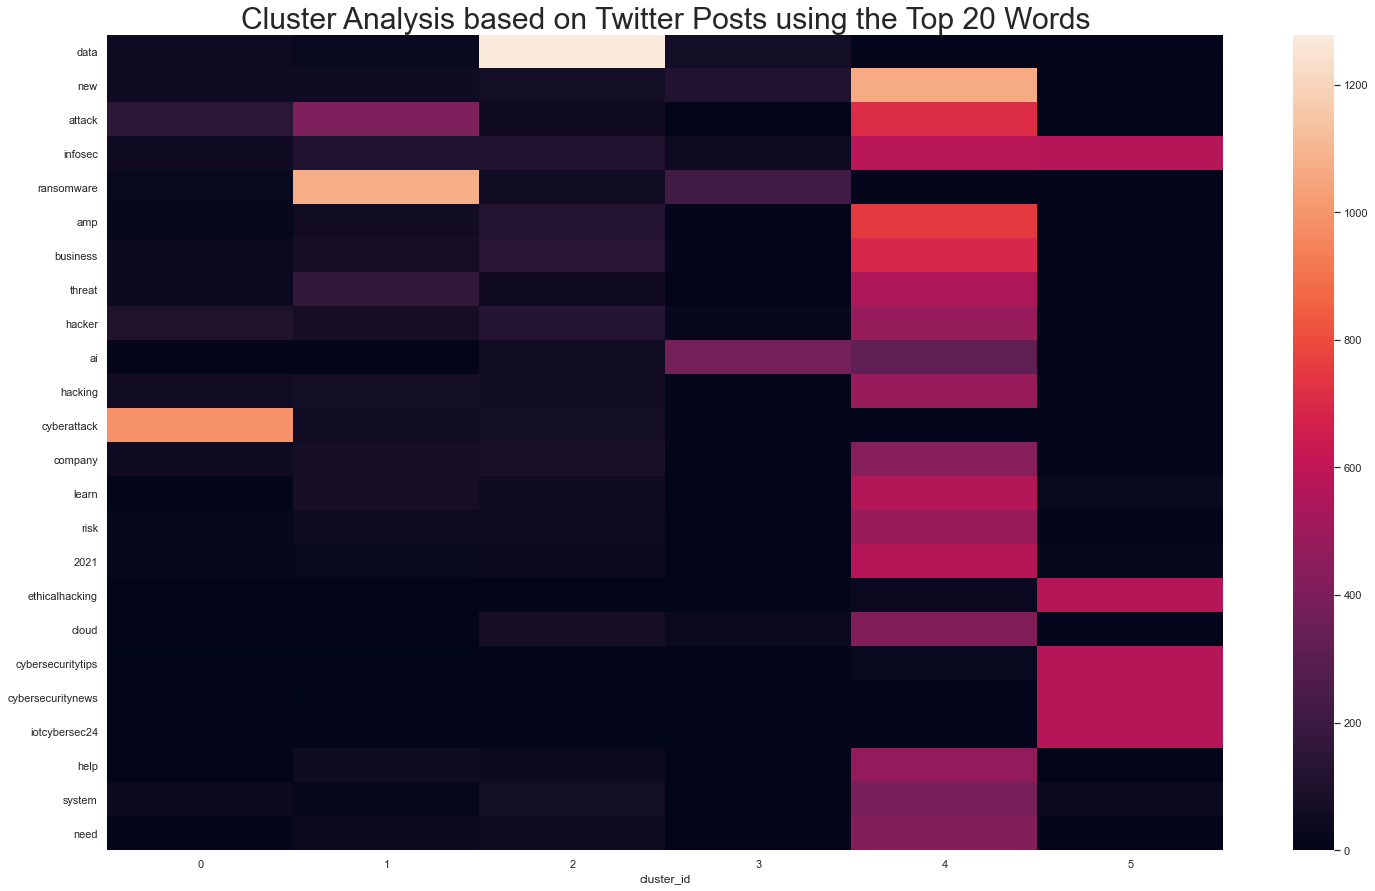

In [58]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Indentifying Variable Analysis

In [31]:
desc = pd.read_csv('cybersec_processed.csv')[['description', 'user_id']].drop_duplicates('user_id')
desc.head().set_index('user_id')

,description
user_id,
x109082290,leader news hacker hacking techjobs nationalcy...
x194297917,gregory evans mogul founder nationalcybersecur...
x1404297347950071818,NaN
x4439325029,NaN
x821567125785612288,iiotworld first global digitalpublication focu...


In [68]:
user_id = desc[['user_id']].reset_index().drop('index', axis = 1)
user_id

,user_id
0,x109082290
1,x194297917
2,x1404297347950071818
3,x4439325029
4,x821567125785612288
...,...
7631,x14478142
7632,x2491363200
7633,x928636804487622656
7634,x380464757


In [32]:
desc.shape

(7636, 2)

### Word Frequency | Description

In [33]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['leader', 'news', 'hacker', 'hacking', 'techjobs']

In [34]:
len(desc_words)

76925

In [35]:
desc_words = [word for word in desc_words if word != 'nan']
len(desc_words)

76306

In [36]:
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'business': 713, 'technology': 616, 'service': 561, 'solution': 559, 'news': 447, 'data': 369, 'tech': 369, 'digital': 368, 'cloud': 291, 'company': 283, ...})

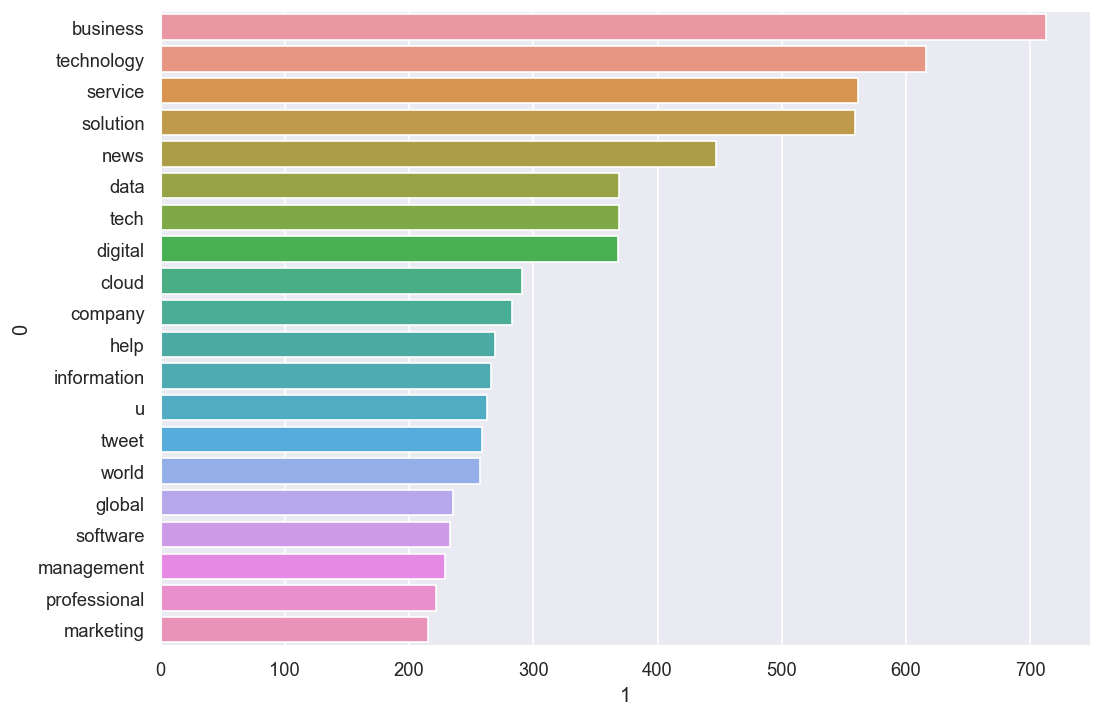

In [37]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
sns.barplot(data = freq_data_desc, x = 1, y = 0);

In [38]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
print(most_common_desc)

['business', 'technology', 'service', 'solution', 'news', 'data', 'tech', 'digital', 'cloud', 'company', 'help', 'information', 'u', 'tweet', 'world', 'global', 'software', 'management', 'professional', 'marketing']


### Cluster Analysis | Description

In [60]:
%%time
desc_vec = pd.read_csv('cybersec_desc_vectorized.csv')
desc_vec.head()
# 3min 17s

CPU times: user 1min 15s, sys: 3.41 s, total: 1min 18s
Wall time: 1min 19s


,Unnamed: 0,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,...,àrea,área,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
desc_vec = desc_vec.drop("Unnamed: 0", axis = 1)
desc_vec.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,àrea,área,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
%%time 
range_k = [i for i in range(1, 10)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k, desc_vec)
    # 3min 44s

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
running Kmeans with k=9
CPU times: user 13min 55s, sys: 36.7 s, total: 14min 31s
Wall time: 3min 33s


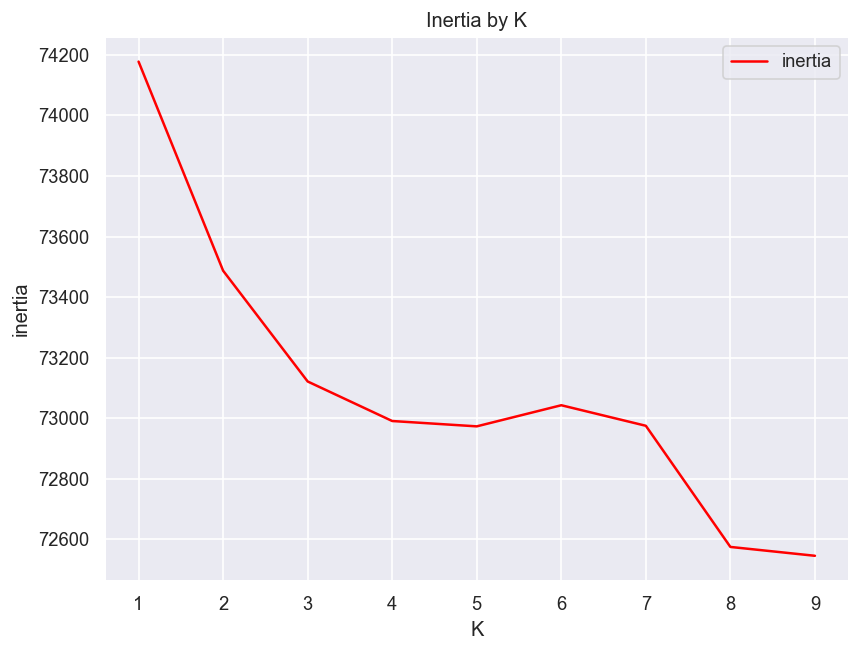

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [64]:
estimator_kmeans = KMeans(random_state=42, n_clusters=8) # 5 for now (the elbow curve is janky)

estimator_kmeans.fit(desc_vec)

KMeans(random_state=42)

In [69]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec["user_id"] = user_id['user_id']
desc_vec

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x109082290
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x194297917
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x1404297347950071818
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x4439325029
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x821567125785612288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x1197561022371905536
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x14478142
7632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x2491363200
7633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x928636804487622656


In [71]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,àrea,área,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
desc_clusters_20 = desc_clusters[['business', 'technology', 'service', 'solution', 'news', 'data', 'tech', 'digital', 'cloud', 'company', 'help', 'information', 'tweet', 'world', 'global', 'software', 'management', 'professional', 'marketing']]

desc_clusters_20

,business,technology,service,solution,news,data,tech,digital,cloud,company,help,information,tweet,world,global,software,management,professional,marketing
cluster_id,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,108.0,416.0,429.0,1.0,60.0,21.0,47.0,85.0,87.0,35.0,34.0,6.0,30.0,42.0,51.0,52.0,41.0,18.0
3,44.0,46.0,22.0,4.0,404.0,15.0,39.0,19.0,15.0,5.0,1.0,40.0,11.0,29.0,20.0,7.0,6.0,12.0,4.0
4,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,332.0,0.0,0.0,0.0,211.0,254.0,232.0,145.0,142.0,169.0,159.0,189.0,177.0,136.0,138.0,132.0,145.0,152.0
7,573.0,97.0,73.0,99.0,2.0,28.0,40.0,45.0,27.0,43.0,59.0,24.0,8.0,18.0,29.0,27.0,29.0,17.0,27.0


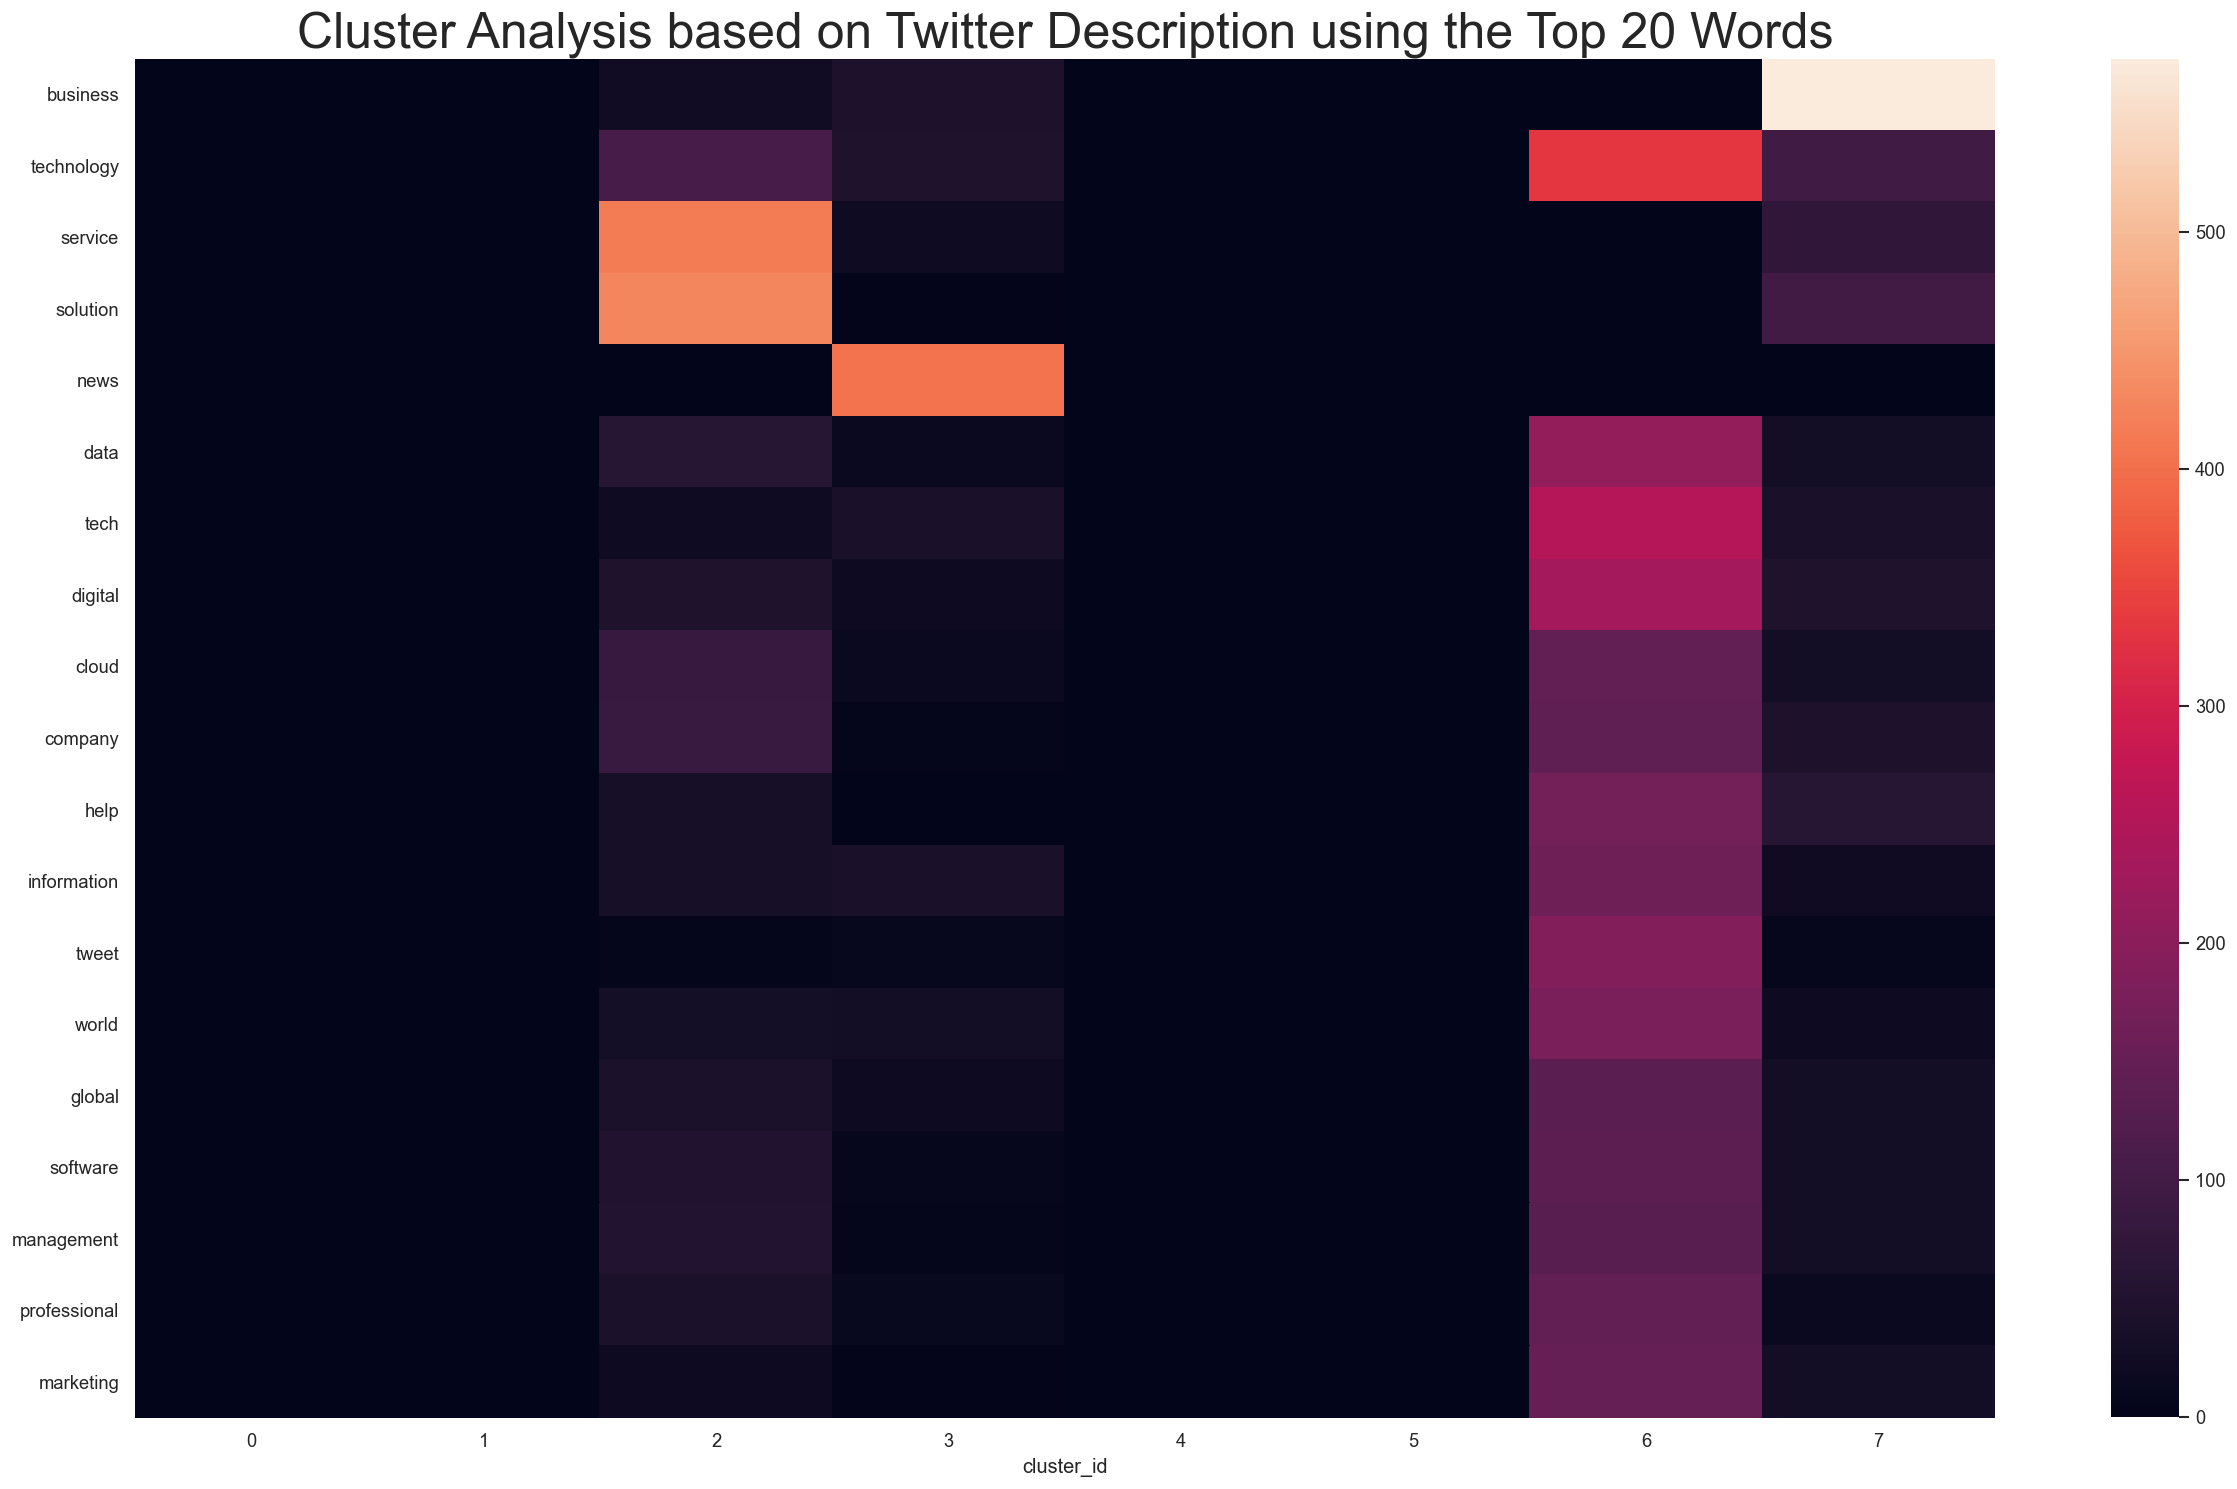

In [73]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

#### Cluster 0 

1. Consists of few words that are among the most common words (just one person lol yikes)

In [101]:
cluster_0 = desc_vec[desc_vec.cluster_id == 0]
cluster_0.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
1528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,x1006334607946649600


In [105]:
print(mainWords(cluster_0.drop('user_id', axis = 1).drop('cluster_id', axis = 1)))

['armed', 'cause', 'conflict', 'highlight', 'hot', 'humanitarian', 'news', 'photography', 'photojournalism', 'side', 'spot', 'take', 'today', 'walk', 'wild', 'world']


#### Cluster 1

1. Consists of few words that are among the most common words (just one person lol yikes)

In [103]:
cluster_1 = desc_vec[desc_vec.cluster_id == 1]
cluster_1.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,x1233005242515677185


In [104]:
mainWords(cluster_1.drop('user_id', axis = 1).drop('cluster_id', axis = 1))

['areu270au2764u270cufe0f',
 'mandela',
 'nelson',
 'nmu',
 'u2764ufe0f',
 'ubuntu',
 'uniu0001f4dau0001f58a']

#### Cluster 2

1. Consists of solution and service
2. 743 individuals
2. Sentiments more neutral than overall

In [110]:
cluster_2 = desc_vec[desc_vec.cluster_id == 2]
cluster_2.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x211329040
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x943529062856822784
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x43492898
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x28859710
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,x2467563638


In [111]:
cluster_2.shape

(743, 18913)

In [112]:
mainWords(cluster_2.drop('user_id', axis = 1).drop('cluster_id', axis = 1))

['service', 'solution']

In [171]:
cluster_2_text = findText(cluster_2)
cluster_2_text.reset_index
len(cluster_2_text.user_id.unique())

743

In [172]:
cluster_2_text.head()

,text,user_id
0,ai act public health tool covid19 policymakers...,x211329040
1,effort get boost federal level moodysinvsvc sa...,x211329040
4,9727 u0001f448\r\ncybersecurity law iotcyberse...,x943529062856822784
5,2999 u0001f448\r\npriceecasting model global x...,x943529062856822784
6,2999 u0001f448\r\nlinux beginner complete guid...,x943529062856822784


In [194]:
sid = SentimentIntensityAnalyzer()
cluster_2_text['scores'] = cluster_2_text['text'].apply(lambda review: sid.polarity_scores(str(review)))
cluster_2_text['compound']  = cluster_2_text['scores'].apply(lambda score_dict: score_dict['compound'])
cluster_2_text['comp_score'] = cluster_2_text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))
cluster_2_text.head()

,text,user_id,scores,compound,comp_score
0,ai act public health tool covid19 policymakers...,x211329040,"{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.6908,pos
1,effort get boost federal level moodysinvsvc sa...,x211329040,"{'neg': 0.151, 'neu': 0.634, 'pos': 0.215, 'co...",0.3182,pos
4,9727 u0001f448\r\ncybersecurity law iotcyberse...,x943529062856822784,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
5,2999 u0001f448\r\npriceecasting model global x...,x943529062856822784,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,2999 u0001f448\r\nlinux beginner complete guid...,x943529062856822784,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


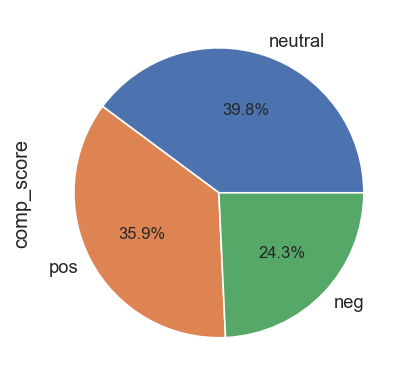

In [208]:
fig, ax = plt.subplots(figsize=(4,4))
comp_score_counts_c2 = cluster_2_text.comp_score.value_counts()
comp_score_counts_c2.plot.pie(autopct="%.1f%%");

#### Cluster 3

1. Consists of news
2. 404 indivuals
2. Sentiments more neutral than overall

In [178]:
cluster_3 = desc_vec[desc_vec.cluster_id == 3]
cluster_3.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x109082290
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x337015409
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x149109780
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x624973600
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,x18454808


In [179]:
cluster_3.shape

(404, 18913)

In [180]:
mainWords(cluster_3.drop('user_id', axis = 1).drop('cluster_id', axis = 1))

['news']

In [181]:
cluster_3_text = findText(cluster_3)
cluster_3_text.reset_index
len(cluster_3_text.user_id.unique()) #missing 1, help

403

In [182]:
sid = SentimentIntensityAnalyzer()
cluster_3_text['scores'] = cluster_3_text['text'].apply(lambda review: sid.polarity_scores(str(review)))
cluster_3_text['compound']  = cluster_3_text['scores'].apply(lambda score_dict: score_dict['compound'])
cluster_3_text['comp_score'] = cluster_3_text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))
cluster_3_text.head()

,text,user_id,scores,compound,comp_score
0,sign cause solution network data breach cyber...,x109082290,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182,pos
1,battling chinese big tech encroachment india ...,x109082290,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.2732,neg
2,ask dr jeanette success way devil choke chain ...,x109082290,"{'neg': 0.256, 'neu': 0.55, 'pos': 0.194, 'com...",-0.4404,neg
3,threat digital pakistan cyberattack,x109082290,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp...",-0.5267,neg
4,pakistan attack news pakistan army claim major...,x109082290,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351,neg


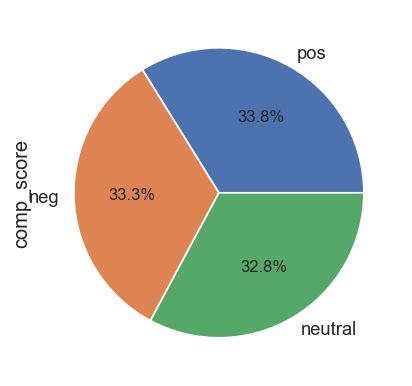

In [207]:
fig, ax = plt.subplots(figsize=(4,4))
comp_score_counts_c3 = cluster_3_text.comp_score.value_counts()
comp_score_counts_c3.plot.pie(autopct="%.1f%%");

#### Cluster 4 

1. Consists of few words that are among the most common words (just 2 people)

In [184]:
cluster_4 = desc_vec[desc_vec.cluster_id == 4]
cluster_4.head()`

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
1941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,x140429955
7490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,x3300689862


In [186]:
print(mainWords(cluster_4.drop('user_id', axis = 1).drop('cluster_id', axis = 1)))

['consultant', 'credential', 'cybersecurityproject', 'e3zine', 'global', 'independent', 'management', 'news', 'outlet', 'partner', 'pro', 'professional', 'project', 'sap', 'scene', 'tech', 'user']


#### Cluster 5 

1. Consists of few words that are among the most common words (just 1 person)

In [187]:
cluster_5 = desc_vec[desc_vec.cluster_id == 5]
cluster_5.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
2336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,x1188102517793665024


In [188]:
print(mainWords(cluster_5.drop('user_id', axis = 1).drop('cluster_id', axis = 1)))

['america', 'business', 'cmit', 'company', 'dedicated', 'delivering', 'enterpriseclass', 'medium', 'north', 'premier', 'size', 'small', 'solution', 'support']


#### Cluster 6 

1. Least cohesive group,there are no words that atlest 10% of people share in their bios
2. 5910 individual people

In [189]:
cluster_6 = desc_vec[desc_vec.cluster_id == 6]
cluster_6.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x194297917
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x1404297347950071818
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x4439325029
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x821567125785612288
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,x953682855372009472


In [190]:
cluster_6.shape

(5910, 18913)

In [193]:
print(mainWords(cluster_6.drop('user_id', axis = 1).drop('cluster_id', axis = 1)))

[]


#### Cluster 7 

1. Mainly have business in their bios
2. 573 individual people

In [196]:
cluster_7 = desc_vec[desc_vec.cluster_id == 7]
cluster_7.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,économique,énfasis,ético,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id,user_id
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,x1148956785858007041
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,x3003618794
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,x823901300236648448
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,x319207370
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,x125913124


In [197]:
cluster_7.shape

(573, 18913)

In [200]:
print(mainWords(cluster_7.drop('user_id', axis = 1).drop('cluster_id', axis = 1)))

['business']


In [202]:
cluster_7_text = findText(cluster_7)
cluster_7_text.reset_index
len(cluster_7_text.user_id.unique()) #missing 1, help

573

In [203]:
sid = SentimentIntensityAnalyzer()
cluster_7_text['scores'] = cluster_7_text['text'].apply(lambda review: sid.polarity_scores(str(review)))
cluster_7_text['compound']  = cluster_7_text['scores'].apply(lambda score_dict: score_dict['compound'])
cluster_7_text['comp_score'] = cluster_7_text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))
cluster_7_text.head()

,text,user_id,scores,compound,comp_score
0,join live podcast learn property popia act com...,x1148956785858007041,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.2960,pos
1,ad\r\ncyber unravelled day left popi act compl...,x1148956785858007041,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.2960,pos
4,wondering long take hacker start exploiting pa...,x3003618794,"{'neg': 0.141, 'neu': 0.728, 'pos': 0.131, 'co...",-0.0516,neg
5,cloud many strategic advantage business especi...,x3003618794,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.2500,pos
8,ransomware attack rise could surpass 265 billi...,x823901300236648448,"{'neg': 0.197, 'neu': 0.637, 'pos': 0.166, 'co...",-0.1280,neg


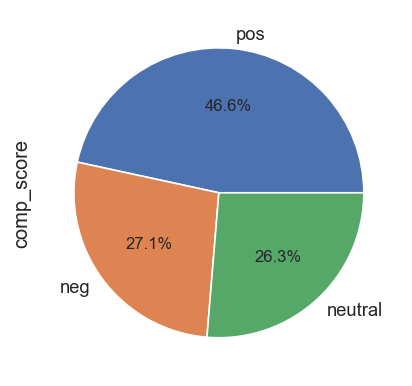

In [206]:
fig, ax = plt.subplots(figsize=(4,4))
comp_score_counts_c7 = cluster_7_text.comp_score.value_counts()
comp_score_counts_c7.plot.pie(autopct="%.1f%%");

### Cluster Analysis | Other Columns

#### Processing Data

In [209]:
ident = data[["country", "is_quote", "retweet_count", "day_post_created", "followers_count", "friends_count", "listed_count", "verified", "year_account_created"]]
ident.head() # remove is_retweet and protected, no variance

,country,is_quote,retweet_count,day_post_created,followers_count,friends_count,listed_count,verified,year_account_created
0,United States,False,0,14.0,8524,157,134.0,False,2010.0
1,United States,False,4,12.0,8524,157,134.0,False,2010.0
2,United States,False,3,12.0,8524,157,134.0,False,2010.0
3,United States,False,2,13.0,8524,157,134.0,False,2010.0
4,United States,False,2,13.0,8524,157,134.0,False,2010.0


In [210]:
ident = ident.drop(labels = [4723, 4725, 4727, 4729, 4732, 4734, 4736, 4738], axis = 0)

In [211]:
ident.isna().sum()

country                 0
is_quote                0
retweet_count           0
day_post_created        0
followers_count         0
friends_count           0
listed_count            0
verified                0
year_account_created    0
dtype: int64

In [213]:
ident['year_account_created'] = ident['year_account_created'].astype("category")
ident['followers_count'] = ident['followers_count'].astype("float64")
ident['friends_count'] = ident['friends_count'].astype("float64")
ident['retweet_count'] = ident['retweet_count'].astype("float64")
ident['age_of_account'] = 2021 - ident['year_account_created'].astype("float64")

In [214]:
ident.dtypes

country                   object
is_quote                  object
retweet_count            float64
day_post_created         float64
followers_count          float64
friends_count            float64
listed_count             float64
verified                  object
year_account_created    category
age_of_account           float64
dtype: object

In [215]:
ident = ident.drop('year_account_created', axis = 1)
ident.head()

,country,is_quote,retweet_count,day_post_created,followers_count,friends_count,listed_count,verified,age_of_account
0,United States,False,0.0,14.0,8524.0,157.0,134.0,False,11.0
1,United States,False,4.0,12.0,8524.0,157.0,134.0,False,11.0
2,United States,False,3.0,12.0,8524.0,157.0,134.0,False,11.0
3,United States,False,2.0,13.0,8524.0,157.0,134.0,False,11.0
4,United States,False,2.0,13.0,8524.0,157.0,134.0,False,11.0


In [216]:
numerical_data = ident.select_dtypes(np.number)
numerical_data.head()

,retweet_count,day_post_created,followers_count,friends_count,listed_count,age_of_account
0,0.0,14.0,8524.0,157.0,134.0,11.0
1,4.0,12.0,8524.0,157.0,134.0,11.0
2,3.0,12.0,8524.0,157.0,134.0,11.0
3,2.0,13.0,8524.0,157.0,134.0,11.0
4,2.0,13.0,8524.0,157.0,134.0,11.0


In [217]:
categorical_data = ident.drop(numerical_data, axis = 1)
categorical_data.head()

,country,is_quote,verified
0,United States,False,False
1,United States,False,False
2,United States,False,False
3,United States,False,False
4,United States,False,False


In [218]:
numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
    numerical_data_normalized,
    columns=numerical_data.columns) 

numerical_data_normalized.head()

,retweet_count,day_post_created,followers_count,friends_count,listed_count,age_of_account
0,0.000000,1.000000,0.000846,0.000389,0.001236,0.733333
1,0.016064,0.333333,0.000846,0.000389,0.001236,0.733333
2,0.012048,0.333333,0.000846,0.000389,0.001236,0.733333
3,0.008032,0.666667,0.000846,0.000389,0.001236,0.733333
4,0.008032,0.666667,0.000846,0.000389,0.001236,0.733333


In [227]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
).reset_index()
categorical_data_codified.head()

,index,country_Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر,country_Argentina,country_Asia,country_Australia,country_Azərbaycan,country_België / Belgique / Belgien,country_Bermuda,country_Bolivia,country_Bosna i Hercegovina / Босна и Херцеговина,...,country_ኢትዮጵያ,country_日本,country_臺灣,country_龙虬庄文化,country_대한민국,country_조선민주주의인민공화국,is_quote_True,verified_True,verified_False,verified_True
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [228]:
categorical_data_codified = categorical_data_codified[['country_United States', 'country_Unknown', 'country_United Kingdom', 'country_India', 'country_Global', 'is_quote_True', 'verified_True', 'verified_False']]
# using only top 5 most common countries

In [230]:
df2_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
).reset_index()

In [235]:
#df2_processed = df2_processed.drop('level_0', axis = 1)
#df2_processed = df2_processed.drop('index', axis = 1)
df2_processed = df2_processed.drop('verified_True', axis = 1)
df2_processed.head()


,retweet_count,day_post_created,followers_count,friends_count,listed_count,age_of_account,country_United States,country_Unknown,country_United Kingdom,country_India,country_Global,is_quote_True,verified_False
0,0.000000,1.000000,0.000846,0.000389,0.001236,0.733333,1,0,0,0,0,0,1
1,0.016064,0.333333,0.000846,0.000389,0.001236,0.733333,1,0,0,0,0,0,1
2,0.012048,0.333333,0.000846,0.000389,0.001236,0.733333,1,0,0,0,0,0,1
3,0.008032,0.666667,0.000846,0.000389,0.001236,0.733333,1,0,0,0,0,0,1
4,0.008032,0.666667,0.000846,0.000389,0.001236,0.733333,1,0,0,0,0,0,1


#### Analysis

In [236]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k, df2_processed)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
CPU times: user 16 s, sys: 4.1 s, total: 20.1 s
Wall time: 2.67 s


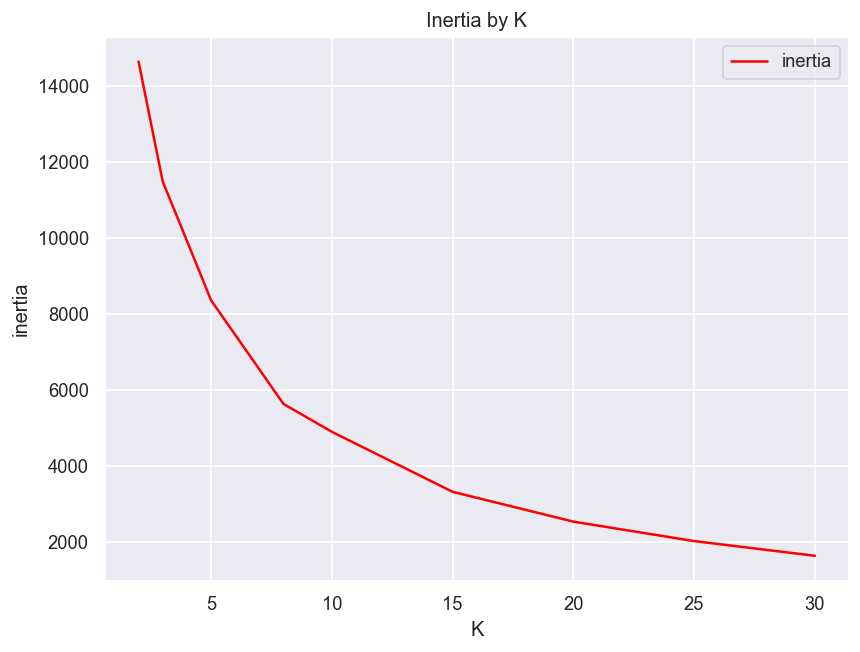

In [237]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [238]:
estimator_kmeans = KMeans(random_state=42, n_clusters=15) # 5 for now (the elbow curve is janky)

estimator_kmeans.fit(df2_processed)

KMeans(n_clusters=15, random_state=42)

In [239]:
ident["cluster_id"] = estimator_kmeans.labels_
ident.head()

,country,is_quote,retweet_count,day_post_created,followers_count,friends_count,listed_count,verified,age_of_account,cluster_id
0,United States,False,0.0,14.0,8524.0,157.0,134.0,False,11.0,1
1,United States,False,4.0,12.0,8524.0,157.0,134.0,False,11.0,10
2,United States,False,3.0,12.0,8524.0,157.0,134.0,False,11.0,10
3,United States,False,2.0,13.0,8524.0,157.0,134.0,False,11.0,1
4,United States,False,2.0,13.0,8524.0,157.0,134.0,False,11.0,1


In [240]:
ident.cluster_id.value_counts()

1     1848
11    1730
5     1632
6     1370
10    1327
9     1298
0     1245
2     1108
7     1100
4     1038
13     979
8      893
12     887
3      666
14     527
Name: cluster_id, dtype: int64

In [241]:
cluster_comparison(0,1,2,3,4)

cluster_id,0.0,1.0,2.0,3.0,4.0
country,Unknown,United States,Canada,United Kingdom,Canada
is_quote,0.02249,0.018398,0.101083,0.033033,0.045279
verified,False,False,False,False,False
retweet_count,3.000803,1.672078,3.290614,2.998498,2.723507
day_post_created,13.68996,13.655844,11.525271,12.851351,13.572254
followers_count,6144.073092,9441.938853,6430.271661,10797.902402,11765.406551
friends_count,2314.421687,2437.635281,2890.378159,2191.042042,2950.349711
listed_count,348.057028,173.614719,259.472022,336.345345,316.939306
age_of_account,5.421687,8.155303,7.768051,7.597598,7.28131


In [242]:
cluster_results = kmeans_cluster(df2_processed, 15)
cluster_summary2 = graph_summary_clustering(cluster_results)

In [243]:
#cluster_summary2 = cluster_summary2.drop('cluster_id', axis = 1)
cluster_summary2

,age_of_account,country_Global,country_India,country_United Kingdom,country_United States,country_Unknown,day_post_created,followers_count,friends_count,is_quote_True,listed_count,retweet_count,verified_False
Cluster,,,,,,,,,,,,,
0,0.361446,0.0,0.0,0.0,0.0,1.0,0.896653,0.000610,0.005739,0.022490,0.003211,0.012051,1.000000
1,0.543687,0.0,0.0,0.0,1.0,0.0,0.885281,0.000937,0.006044,0.018398,0.001602,0.006715,1.000000
2,0.517870,0.0,0.0,0.0,0.0,0.0,0.175090,0.000638,0.007167,0.101083,0.002394,0.013215,0.000000
3,0.506507,0.0,0.0,1.0,0.0,0.0,0.617117,0.001072,0.005433,0.033033,0.003103,0.012042,1.000000
4,0.485421,0.0,0.0,0.0,0.0,0.0,0.857418,0.001168,0.007316,0.045279,0.002924,0.010938,0.000000
5,0.408088,0.0,0.0,0.0,0.0,1.0,0.150940,0.001258,0.003491,0.042892,0.002039,0.009592,0.000000
6,0.381071,0.0,0.0,0.0,0.0,1.0,0.836010,0.001940,0.003614,0.072263,0.002169,0.010717,0.000000
7,0.536000,0.0,0.0,0.0,1.0,0.0,0.839091,0.002978,0.008169,0.030909,0.005003,0.011727,0.000000
8,0.497947,0.0,0.0,1.0,0.0,0.0,0.599104,0.001753,0.004555,0.033595,0.002711,0.006535,0.000000


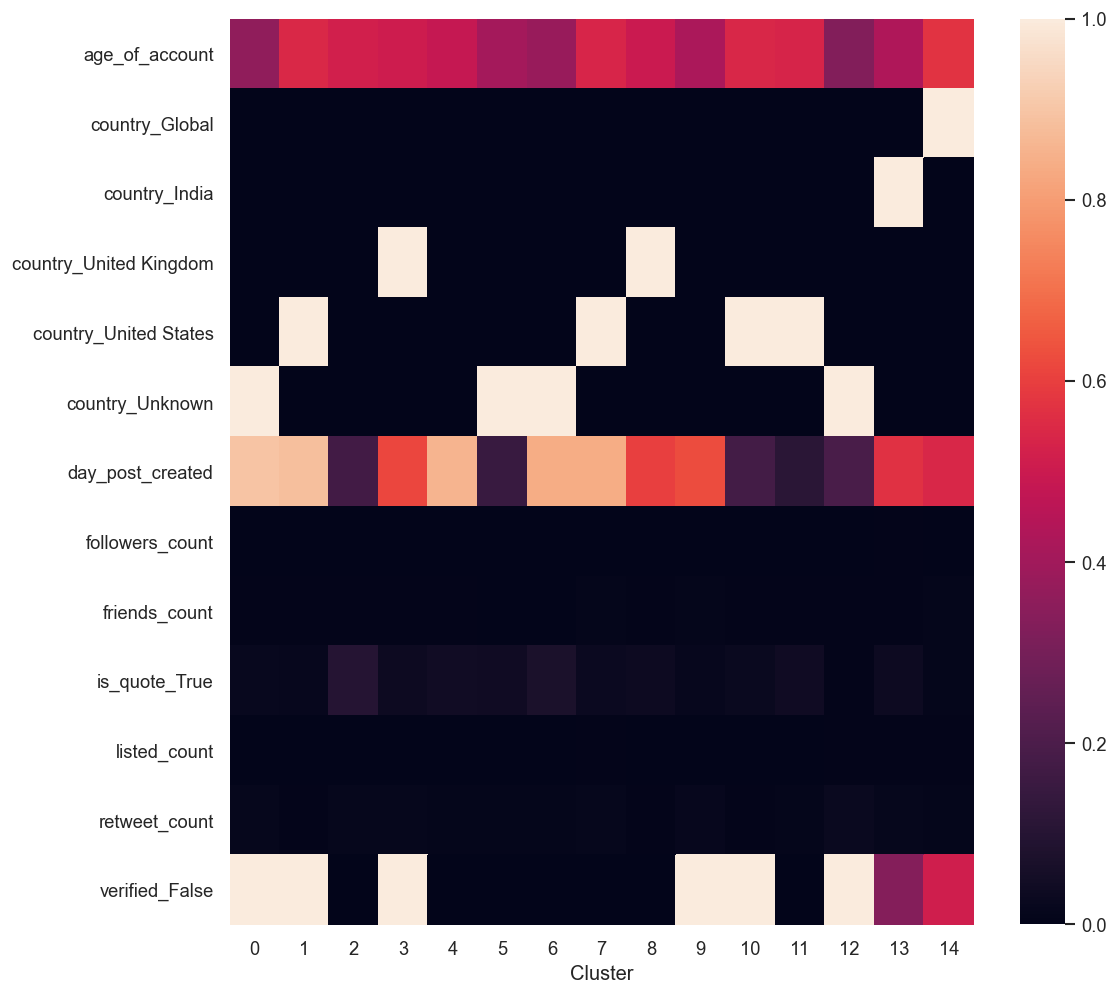

In [244]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary2.transpose(), annot=False);